In [2]:
#import all libraries and format data tables with style format for readability
import pandas as pd

In [3]:
import json
from pandas.io.json import json_normalize

In [12]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [18]:
%matplotlib inline

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [5]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [6]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


In [50]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))


[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

#JSON exercise
Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
    1. Find the 10 countries with most projects
    2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
#create banks dataframe from json file and explore top 5 
banks_df = pd.read_json('data/world_bank_projects.json')
banks_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [9]:
#explore the types of info in each column of banks_df
banks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

# Q1: Find the 10 countries with most projects

In [78]:
# countrycode appears to have all the countries listed in a concise format
banks_df.countrycode.value_counts()

CN    19
ID    19
VN    17
IN    16
RY    13
NP    12
MA    12
BD    12
3A    11
MZ    11
BR     9
BF     9
PK     9
AM     8
TZ     8
TJ     8
LA     7
KG     7
NG     7
JO     7
KE     6
ZR     6
GZ     6
PE     6
AF     6
NI     6
PG     5
HN     5
MD     5
HT     5
      ..
GT     2
JM     2
BO     2
AR     2
MU     2
EG     2
KH     2
AO     1
NA     1
KI     1
ZW     1
7E     1
TH     1
AG     1
CL     1
TV     1
CG     1
LK     1
4E     1
RO     1
TD     1
CV     1
YF     1
BY     1
PL     1
TO     1
CF     1
PA     1
BA     1
CR     1
Name: countrycode, Length: 118, dtype: int64

In [21]:
#top ten cutoff list
banks_df.countrycode.value_counts().head(10)

CN    19
ID    19
VN    17
IN    16
RY    13
NP    12
MA    12
BD    12
3A    11
MZ    11
Name: countrycode, dtype: int64

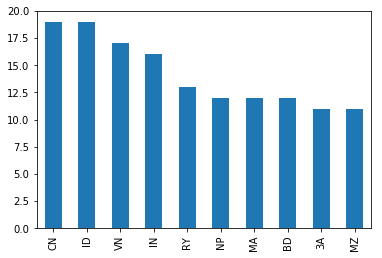

In [20]:
#top ten can be plotted by value counts
banks_df.countrycode.value_counts().head(10).plot(kind = 'bar', ylim=[0,20])

# Q2: Find the top 10 major project themes (using column 'mjtheme_namecode')


In [77]:
#some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.
#First explore what type of data is in this column, which appears to be nested json elements
themes = banks_df.mjtheme_namecode
themes

0      [{'code': '8', 'name': 'Human development'}, {...
1      [{'code': '1', 'name': 'Economic management'},...
2      [{'code': '5', 'name': 'Trade and integration'...
3      [{'code': '7', 'name': 'Social dev/gender/incl...
4      [{'code': '5', 'name': 'Trade and integration'...
5      [{'code': '6', 'name': 'Social protection and ...
6      [{'code': '2', 'name': 'Public sector governan...
7      [{'code': '11', 'name': 'Environment and natur...
8      [{'code': '10', 'name': 'Rural development'}, ...
9      [{'code': '2', 'name': 'Public sector governan...
10     [{'code': '10', 'name': 'Rural development'}, ...
11     [{'code': '10', 'name': 'Rural development'}, ...
12                           [{'code': '4', 'name': ''}]
13     [{'code': '5', 'name': 'Trade and integration'...
14     [{'code': '6', 'name': 'Social protection and ...
15     [{'code': '10', 'name': 'Rural development'}, ...
16     [{'code': '10', 'name': 'Rural development'}, ...
17     [{'code': '8', 'name': '

In [76]:
#use normalization to create pddf of code, name, id combination
bstr = json.load((open('data/world_bank_projects.json')))
theme_df = json_normalize(bstr, 'mjtheme_namecode', 'id')

#print the top ten count of theme names from df
print("Top 10 Themes")
theme_df['name'].value_counts().head(10)

Top 10 Themes


Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

# Q3: In 2. above,   you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [79]:
#first step is to create a mapping dictionary of theme codes : theme names
#loop through theme_df rows using pandas itertuples()
#if theme name IS NOT blank then the dictionary maps code to theme
name_dict = {}
for row in theme_df.itertuples():
    if row[2] != '':
        name_dict[row[1]] = row[2]
name_dict

{'1': 'Economic management',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development'}

In [80]:
#second step is to fill in missing themes using the dictionary code:name map for themes
#use pandas itertuples() again to use set_value() if theme name IS blank
for row in theme_df.itertuples():
    if row[2] == '':
        theme_df.set_value(row[0], 'name', name_dict[row[1]])

#confirm no blanks are left when the filtered df is empty (zero rows)
theme_df[theme_df['name'] == '']

,code,name,id


In [81]:
# finally display top 10 theme projects
print("Top 10 themes")
theme_df.name.value_counts().head(10)

Top 10 themes


Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64